<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc" style="margin-top: 1em;"><ul class="toc-item"><li><span><a href="#Polarization-Demo" data-toc-modified-id="Polarization-Demo-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Polarization Demo</a></span></li><li><span><a href="#Basic-Polarization-States" data-toc-modified-id="Basic-Polarization-States-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Basic Polarization States</a></span></li><li><span><a href="#Linear-Polarizers" data-toc-modified-id="Linear-Polarizers-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Linear Polarizers</a></span></li><li><span><a href="#Quarter-Wave-Plates" data-toc-modified-id="Quarter-Wave-Plates-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Quarter-Wave Plates</a></span></li><li><span><a href="#Half-Wave-Plates" data-toc-modified-id="Half-Wave-Plates-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Half-Wave Plates</a></span></li><li><span><a href="#Visualization" data-toc-modified-id="Visualization-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Visualization</a></span></li></ul></div>

# Polarization Demo

** EE/PHY 450/550**

** Scott Prahl**

** 7 Apr 2018, Version 1**

In [1]:
# Execute this cell first

%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt

# if the ofiber package is missing, then run on the command-line (or anaconda prompt)
# 
#      pip install --upgrade pypolar

# only needed while developing
import sys
sys.path.append('/Users/prahl/Documents/Code/git/pypolar')

import pypolar as pp

In [2]:
dir(pp)

['__author__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 'attenuator',
 'basics',
 'drawPhaseDiagram',
 'drawPropagatingWave',
 'half_wave_plate',
 'horizontal_polarized',
 'intensity',
 'interpret',
 'jones_check',
 'left_circular_polarized',
 'linear_polarized',
 'linear_polarizer',
 'mirror',
 'phase',
 'quarter_wave_plate',
 'retarder',
 'right_circular_polarized',
 'rotation',
 'showPolarization',
 'showPolarizationAnimation',
 'vertical_polarized',
 'visualization']

# Basic Polarization States

In [2]:
light = pp.horizontal_polarized()
print("Jones vector for horizontally-polarized light")
print(light)

light = pp.vertical_polarized()
print("Jones vector for vertically-polarized light")
print(light)

light = pp.linear_polarized(np.radians(45))
print("Jones vector for 45° linearly polarized light")
print(light)

light = pp.right_circular_polarized()
print("Jones vector for right circularly polarized light")
print(light)

light = pp.left_circular_polarized()
print("Jones vector for left circularly polarized light")
print(light)

Jones vector for horizontally-polarized light
[1. 0.]
Jones vector for vertically-polarized light
[6.123234e-17 1.000000e+00]
Jones vector for 45° linearly polarized light
[0.70710678 0.70710678]
Jones vector for right circularly polarized light
[0.70710678+0.j         0.        -0.70710678j]
Jones vector for left circularly polarized light
[0.70710678+0.j         0.        +0.70710678j]


# Linear Polarizers

In [3]:
for theta in np.radians([0,45,90,-45]):
    print('Jones Matrix for perfect linear polarizer at angle theta=',theta/np.pi*180)
    L = pp.linear_polarizer(theta)
    L = pp.zero_if_near_zero(L)
    print(L)
    print()


Jones Matrix for perfect linear polarizer at angle theta= 0.0
[[1.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]]

Jones Matrix for perfect linear polarizer at angle theta= 45.0
[[0.5+0.j 0.5+0.j]
 [0.5+0.j 0.5+0.j]]

Jones Matrix for perfect linear polarizer at angle theta= 90.0
[[0.+0.j 0.+0.j]
 [0.+0.j 1.+0.j]]

Jones Matrix for perfect linear polarizer at angle theta= -45.0
[[ 0.5+0.j -0.5+0.j]
 [-0.5+0.j  0.5+0.j]]



# Quarter-Wave Plates

In [4]:
for theta in np.radians([0,45,90,-45]):
    print('Jones Matrix for quarter wave plate with fast axis at angle theta=',theta/np.pi*180)
    L = pp.quarter_wave_plate(theta)
    L = pp.zero_if_near_zero(L)
    print(L)
    norm = L[0,0]
    L = pp.zero_if_near_zero(L/norm)
    print("and when scaled by so top left element is unity")
    print(L)

    print()

Jones Matrix for quarter wave plate with fast axis at angle theta= 0.0
[[0.70710678+0.70710678j 0.        +0.j        ]
 [0.        +0.j         0.70710678-0.70710678j]]
and when scaled by so top left element is unity
[[1.+0.j 0.+0.j]
 [0.+0.j 0.-1.j]]

Jones Matrix for quarter wave plate with fast axis at angle theta= 45.0
[[0.70710678+0.j         0.        +0.70710678j]
 [0.        +0.70710678j 0.70710678+0.j        ]]
and when scaled by so top left element is unity
[[1.+0.j 0.+1.j]
 [0.+1.j 1.+0.j]]

Jones Matrix for quarter wave plate with fast axis at angle theta= 90.0
[[0.70710678-0.70710678j 0.        +0.j        ]
 [0.        +0.j         0.70710678+0.70710678j]]
and when scaled by so top left element is unity
[[1.+0.j 0.+0.j]
 [0.+0.j 0.+1.j]]

Jones Matrix for quarter wave plate with fast axis at angle theta= -45.0
[[0.70710678+0.j         0.        -0.70710678j]
 [0.        -0.70710678j 0.70710678+0.j        ]]
and when scaled by so top left element is unity
[[1.+0.j 0.-1.j]

# Half-Wave Plates

In [5]:
for theta in np.radians([0,90]):
    print('Jones Matrix for half-wave plate with fast axis at angle theta=',theta/np.pi*180)
    L = pp.half_wave_plate(theta)
    print(pp.zero_if_near_zero(L))
    norm = L[0,0]
    print("and when scaled by so top left element is unity")
    print(pp.zero_if_near_zero(L/norm))
    print()
    
for theta in np.radians([45,-45]):
    print('Jones Matrix for half-wave plate with fast axis at angle theta=',theta/np.pi*180)
    L = pp.half_wave_plate(theta)
    print(pp.zero_if_near_zero(L))
    print()

Jones Matrix for half-wave plate with fast axis at angle theta= 0.0
[[0.+1.j 0.+0.j]
 [0.+0.j 0.-1.j]]
and when scaled by so top left element is unity
[[ 1.+0.j  0.+0.j]
 [ 0.+0.j -1.+0.j]]

Jones Matrix for half-wave plate with fast axis at angle theta= 90.0
[[0.-1.j 0.+0.j]
 [0.+0.j 0.+1.j]]
and when scaled by so top left element is unity
[[ 1.+0.j  0.+0.j]
 [ 0.+0.j -1.+0.j]]

Jones Matrix for half-wave plate with fast axis at angle theta= 45.0
[[0.+0.j 0.+1.j]
 [0.+1.j 0.+0.j]]

Jones Matrix for half-wave plate with fast axis at angle theta= -45.0
[[0.+0.j 0.-1.j]
 [0.-1.j 0.+0.j]]



# Visualization

<IPython.core.display.Javascript object>


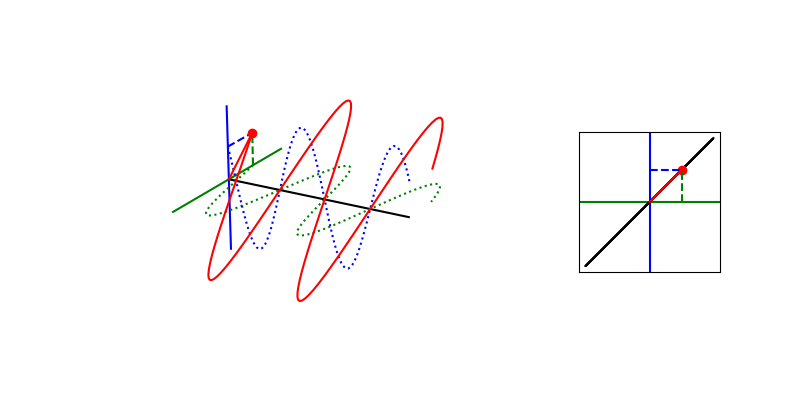

In [7]:
aplt = pp.showPolarization(pp.linear_polarized(np.radians(45)),offset=np.pi/3)
aplt.show()

<IPython.core.display.Javascript object>


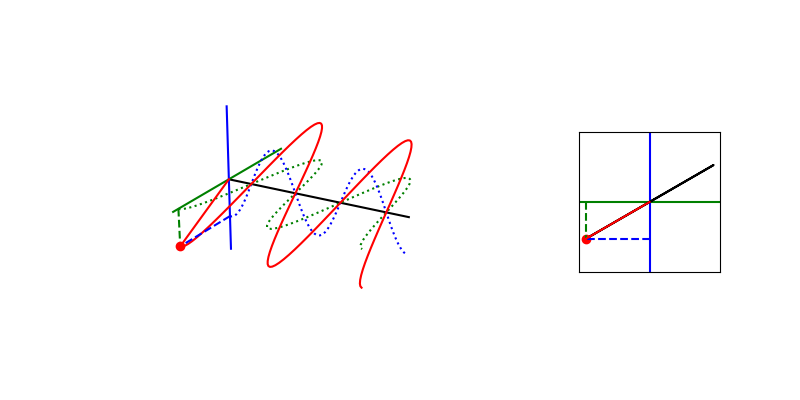

In [8]:
pp.showPolarizationAnimation(pp.linear_polarized(np.radians(30)))

<IPython.core.display.Javascript object>


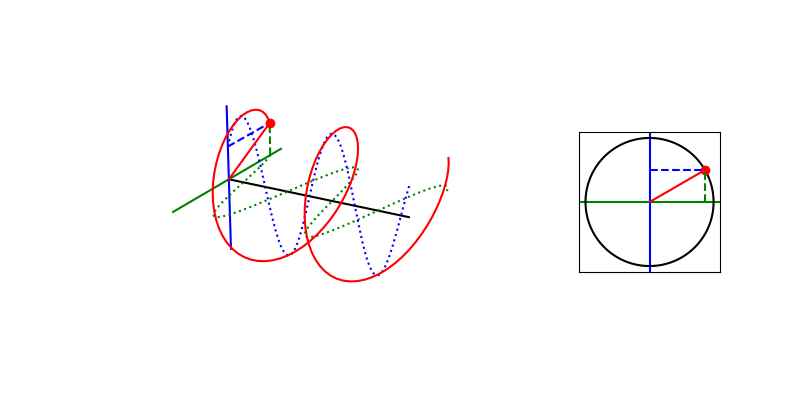

In [9]:
aplt = pp.showPolarization(pp.left_circular_polarized(),offset=np.pi/6)
aplt.show()

<IPython.core.display.Javascript object>


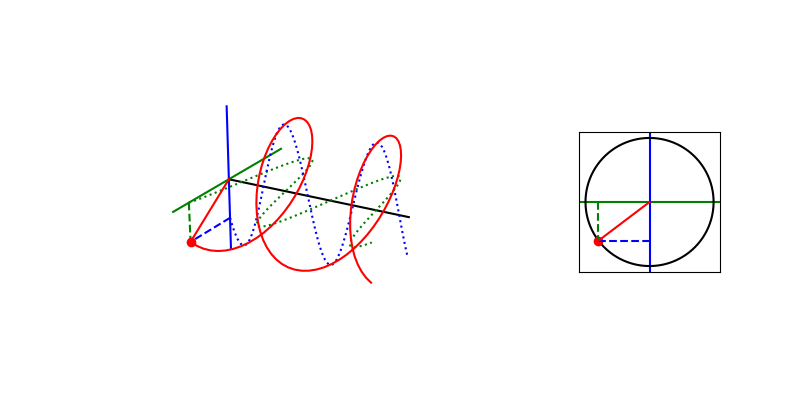

In [10]:
v=pp.left_circular_polarized()
pp.showPolarizationAnimation(v)

In [11]:
pp.jones_check([1, -1j])

'Right circular polarization'

In [12]:
pp.jones_check([0.5, 0.5])

'Linear polarization at 45.000000 degrees CCW from x-axis'

In [13]:
pp.jones_check( np.array([np.exp(-1j*np.pi), np.exp(-1j*np.pi/3)]) )

'Left circular polarization'

In [15]:
pp.jones_check(pp.horizontal_polarized())

'Linear polarization at 0.000000 degrees CCW from x-axis'

In [16]:
pp.jones_check(pp.vertical_polarized())

'Linear polarization at 90.000000 degrees CCW from x-axis'

In [17]:
pp.jones_check(pp.linear_polarized(np.radians(45)))

'Linear polarization at 45.000000 degrees CCW from x-axis'